# Basic K Nearest Neighbors

About this notebook: 
- Initial modeel built using the balanced dataset of 1912 images representing 239 images from each of the 8 classes.  
- Will utilize same model on future augmented dataset. 
- Model build inspired by week 07 demos which showed KNN on iris image dataset. 

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn import preprocessing
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from importlib import reload
import constants
import lesion_data
import augmentor
from augmentor import Augmentor
from importlib import reload

reload(augmentor);

## Load Dataset using the balanced dataset

In [3]:
count = 250
path = constants.get_training_augmented_path_with_count_suffix(count=count)
aug = augmentor.Augmentor(dir_path=path)
aug.augment(count)

# Return all images in a np.Array 
x_train, y_train = aug.get_numpy_data()

# Load validation data in np.Array. 
x_val, y_val  = constants.load_validation_split_data_with_labels(limit = 850, resize=(244,244))

# Load Test data in np.Array.  To limit the num of images loaded pass limit=250
x_test, y_test = constants.load_testing_split_data_with_labels(limit = 2000, resize=(244,244))

x_train = x_train / 255
x_val = x_val / 255
x_test = x_test/ 255

Cleaning up isic_data/ISIC_2019_Training_Augmented_250
Start processing class: MEL
Start processing class: NVStart processing class: BCC

Start processing class: AK
(MEL) --> len(all_images)=3261, count=250, subsetting without augmentation.
(BCC) --> len(all_images)=2383, count=250, subsetting without augmentation.
(AK) --> len(all_images)=635, count=250, subsetting without augmentation.
(NV) --> len(all_images)=9251, count=250, subsetting without augmentation.
(NV) --> Done with downsampling class NV.
Start processing class: BKL
(BKL) --> len(all_images)=1902, count=250, subsetting without augmentation.
(AK) --> Done with downsampling class AK.
Start processing class: DF
(DF) --> len(all_images)=178, count=250, augmenting up to required count.
(BCC) --> Done with downsampling class BCC.
Start processing class: VASC
(VASC) --> len(all_images)=185, count=250, augmenting up to required count.
(MEL) --> Done with downsampling class MEL.
Start processing class: SCC
(SCC) --> len(all_images

In [4]:
print("x_train.len=" + str(len(x_train)))
print("y_train.len=" + str(len(y_train)))

print("x_train.shape=" + str(x_train.shape))
print("y_train.shape=" + str(y_train.shape))

print("x_test.len=" + str(len(x_test)))
print("y_test.len=" + str(len(y_test)))

print("x_test.shape=" + str(x_test.shape))
print("y_test.shape=" + str(y_test.shape))

print("x_val.len=" + str(len(x_val)))
print("y_val.len=" + str(len(y_val)))

print("x_val.shape=" + str(x_val.shape))
print("y_val.shape=" + str(y_val.shape))

x_train.len=2000
y_train.len=2000
x_train.shape=(2000, 244, 244, 3)
y_train.shape=(2000, 8)
x_test.len=2000
y_test.len=2000
x_test.shape=(2000, 244, 244, 3)
y_test.shape=(2000, 1, 8)
x_val.len=850
y_val.len=850
x_val.shape=(850, 244, 244, 3)
y_val.shape=(850, 1, 8)


In [5]:
# Flatten to a single vector. x_train goes from (<Rows>, 244, 244, 3) to <Rows> x (244 * 244 * 3) 
x_train = x_train.reshape(x_train.shape[0], 244 * 244 * 3) 
x_val = x_val.reshape(x_val.shape[0], 244 * 244 * 3) 
x_test = x_test.reshape(x_test.shape[0], 244 * 244 * 3) 

# Flatten y
nsamples, nx = y_train.shape
y_train = y_train.reshape((nsamples, nx*1))

nsamples, nx, ny = y_val.shape
y_val = y_val.reshape((nsamples, nx*ny))

nsamples, nx, ny = y_test.shape
y_test = y_test.reshape((nsamples, nx*ny))


print("x_train.shape=" + str(x_train.shape))
print("y_train.shape=" + str(y_train.shape))
print("x_val.shape=" + str(x_val.shape))
print("y_val.shape=" + str(y_val.shape))
print("x_test.shape=" + str(x_test.shape))
print("y_test.shape=" + str(y_test.shape))

x_train.shape=(2000, 178608)
y_train.shape=(2000, 8)
x_val.shape=(850, 178608)
y_val.shape=(850, 8)
x_test.shape=(2000, 178608)
y_test.shape=(2000, 8)


In [6]:
# Check Balance
print("Sum y_train: " + str(y_train.sum(axis=0)))
print("Sum y_val: " + str(y_val.sum(axis=0)))
print("Sum y_test: " + str(y_test.sum(axis=0)))

Sum y_train: [250 250 250 250 250 250 250 250]
Sum y_val: [161. 445.  90.  29.  89.   5.  13.  18.]
Sum y_test: [ 355. 1017.  260.   62.  212.   18.   14.   62.]


In [7]:
# Trying KNN with k=5
# model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# model.fit(x_train, y_train)

# y_val_pred = model.predict(x_val)

# print(f"Accuracy: {metrics.accuracy_score(y_val, y_val_pred)}")
# print(f"Recall: {metrics.recall_score(y_val, y_val_pred, average=None, zero_division=1)}")
# print(f"Precision: {metrics.precision_score(y_val, y_val_pred, average=None, zero_division=1)}")

In [8]:
# Run KNN for different Ks and evaluate using Validation data 
validation_accuracies = []
for k in range(1,50): 
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    validation_accuracies.append((k, metrics.accuracy_score(y_val, y_val_pred)))

In [9]:
# Accuracies for each K 
validation_accuracies

[(1, 0.31176470588235294),
 (2, 0.1188235294117647),
 (3, 0.20352941176470588),
 (4, 0.12823529411764706),
 (5, 0.17882352941176471),
 (6, 0.10941176470588235),
 (7, 0.1423529411764706),
 (8, 0.09411764705882353),
 (9, 0.11647058823529412),
 (10, 0.09176470588235294),
 (11, 0.1188235294117647),
 (12, 0.08823529411764706),
 (13, 0.0976470588235294),
 (14, 0.07176470588235294),
 (15, 0.08588235294117647),
 (16, 0.06),
 (17, 0.07647058823529412),
 (18, 0.052941176470588235),
 (19, 0.07058823529411765),
 (20, 0.05176470588235294),
 (21, 0.0611764705882353),
 (22, 0.04941176470588235),
 (23, 0.052941176470588235),
 (24, 0.04352941176470588),
 (25, 0.05411764705882353),
 (26, 0.03529411764705882),
 (27, 0.04352941176470588),
 (28, 0.03176470588235294),
 (29, 0.03882352941176471),
 (30, 0.03529411764705882),
 (31, 0.03529411764705882),
 (32, 0.027058823529411764),
 (33, 0.03058823529411765),
 (34, 0.027058823529411764),
 (35, 0.03058823529411765),
 (36, 0.023529411764705882),
 (37, 0.02588235

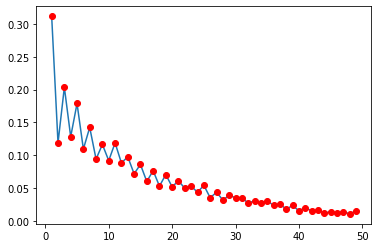

In [10]:
# Plotting validation_accuracies
x_val_plt = [x[0] for x in validation_accuracies]
y_val_plt = [x[1] for x in validation_accuracies]
plt.plot(x_val_plt,y_val_plt)
plt.plot(x_val_plt,y_val_plt,'or')
plt.show()

In [11]:
# Use K = 3 
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_test_pred, average=None, zero_division=1)}")
print(f"Precision: {metrics.precision_score(y_test, y_test_pred, average=None, zero_division=1)}")

Accuracy: 0.21
Recall: [0.07605634 0.28023599 0.14230769 0.27419355 0.16037736 0.55555556
 0.35714286 0.08064516]
Precision: [0.54       0.83577713 0.25694444 0.17894737 0.23776224 0.04672897
 0.0310559  0.125     ]


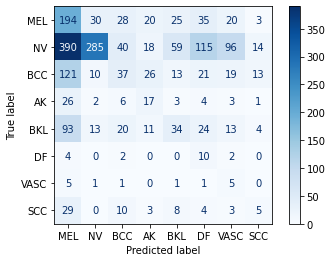

In [12]:
#Confusion matrix: 
labels=["MEL", "NV", "BCC", "AK", "BKL", "DF", "VASC", "SCC"]
cm = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
cm
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()